In [1]:
import numpy as np

import matplotlib.pylab as plt
#%matplotlib notebook # for normal people

#for ben
%matplotlib inline

import sys
sys.path.insert(0, '../sportvu/')


import reading

In [2]:
#infilename = ['Sportvu_Data/quarter1.XML']
infilename = ['quarter1.XML', 'quarter2.XML', 'quarter3.XML', 'quarter4.XML']

#game_data = reading.get_player_data(infilename)

#print(game_data)
players,homeplayers,awayplayers,hometeam,awayteam,ball, homeScore, awayScore, sc = reading.get_player_data(infilename)

Getting positions....
Calculating velocities....
Calculating energies....
Calculating powers....
Initializing keys....
Reordering the players in the dictionaries...


In [3]:
import csv
for k in hometeam.keys():
    infile = open('Player_ID.csv','r')
    rows = csv.reader(infile,delimiter=',')
    
    
    for row in rows:
        if k == row[0]:
            hometeam[k]['name'] = row[1]
for j in awayteam.keys():
    infile = open('Player_ID.csv','r')
    rows = csv.reader(infile,delimiter=',')
    
    
    for row in rows:
        if j == row[0]:
            awayteam[j]['name'] = row[1]

In [ ]:
print awayteam['338365']['name']

In [ ]:
print(len(hometeam['3234']['veloTime']))
print(len(hometeam['3234']['gameTime']))
print(len(hometeam['3234']['ke']))
print(len(hometeam['3234']['powerTime']))
#print(len(hometeam['3234']['gametime']))
#print(hometeam['3234']['t'])
sumf = 0
count = 0
for i in range(len(awayteam['338365']['ke'])):
    if awayteam['338365']['ke'][i] < 1000 and hometeam['3234']['ke'] != -1:
        #print awayteam['338365']['ke'][i]
        sumf += awayteam['338365']['ke'][i]
        count+=1
    
    
print(sumf/count)
#print max(hometeam['3234']['ke'])

In [ ]:
print(len(homeplayers))

In [ ]:
print(homeplayers[1])

In [ ]:
## just change between home / away and PID number to see a different player

x = awayteam['338365']
print(type(x['v']))
v = np.array(x['v'])
t = np.array(x['veloTime'])

valid = v > -1
v = v[valid]
t = t[valid]

q1 = t < 720.0
q2 = t > 720.0
q2 = t < 1440.0
q3 = t > 1440.0
q3 = t < 2160.0
q4 = t > 2160.0

vq1 = np.average(v[q1])
print(vq1)
vq2 = np.average(v[q2])
print(vq2)
vq3 = np.average(v[q3])
print(vq3)
vq4 = np.average(v[q4])
print(vq4)

In [ ]:
## used a scatter plot for the velocity just so last point of one quarter -> first of next quarter don't connect 


plt.figure(figsize = (18,12))
################# these plot the average for each quarter ###############

plt.scatter(np.linspace(0, 720.0,100), vq1, s = 4)
plt.plot(np.linspace(720.0,1440.0, 100), np.linspace(vq2,vq2,100), lw = 4)
plt.plot(np.linspace(1440.0, 2160.0, 100), np.linspace(vq3,vq3,100), lw = 4)
plt.plot(np.linspace(2160.0, 2880.0,100), np.linspace(vq4,vq4,100), lw = 4)
############################################################################
#plt.ylim(0,6)
plt.xlim(0,max(t) + 10)

#plt.scatter(t,v,s = 2)
plt.plot(t,v)
plt.xlabel("Time(s)")
plt.ylabel("Velocity(m/s)")

In [ ]:
x.keys()

In [ ]:
print(t[-10:])
print(v[-10:])

In [ ]:
print(hometeam['3234']['veloTime'][-10:])

In [ ]:
hometeam['3234'].keys()

In [42]:
def percentage(player, lowerLimit, upperLimit):
    plt.figure(figsize = (12,9))
    plt.xlabel("Velocity(m/s)", fontsize = 14)
    plt.ylabel("Percentage of Time Spent over Given Velocity", fontsize = 14)
    
    ############# change numpoints for increased accuracy !!! ##############
    numpoints = 50
    ########################################################################
    
    velocities = np.array(np.linspace(0, upperLimit, numpoints))
    

        #print player
    percentages = np.zeros(numpoints)
    count = 0.0
        #print len(v)
        
    v = player['v']
    for i in range(0, len(v)):

        count += 1.0
        for k in range(0, len(velocities)): #-1,-1):
            #print len(velocities)
            if v[i] >= velocities[k]:
            #for j in range(0, k+1):
                percentages[k] = percentages[k] + 1.0
            elif v[i] == -1:
                percentages[0] = percentages[0] + 1.0
                break
                
#             if v[i] >= upperLimit:
#                 for j in range(0, len(percentages)-1):
#                     percentages[j] = percentages[j] + 1.0
#             elif v[i] >= velocities[len(velocities)-2]:
#                 for j in range(0, len(percentages)-2):
#                     percentages[j] = percentages[j] + 1.0
                    
#             elif v[i] >= velocities[len(velocities)-3]:
#                 for j in range(0, len(percentages)-3):
#                     percentages[j] = percentages[j] + 1.0
#             elif v[i] >= velocities[len(velocities)-4]:
#                 for j in range(0, len(percentages)-4):
#                     percentages[j] = percentages[j] + 1.0
                    
#             elif v[i] >= velocities[len(velocities)-5]:
#                 for j in range(0, len(percentages)-5):
#                     percentages[j] = percentages[j] + 1.0
#             elif v[i] >= -1:
#                 for j in range(0, len(percentages)-6):
#                     percentages[j] = percentages[j] + 1.0
                    

                    
        #for p in range(0, len(percentages)):
            #print velocities[p]
         #   print (float)(percentages[p]/count)
    plt.plot(velocities,percentages/count, label = player['name'])
        
        #plt.label()
           
        #print len(velocities)
    plt.legend(loc = 'best')
        
                    

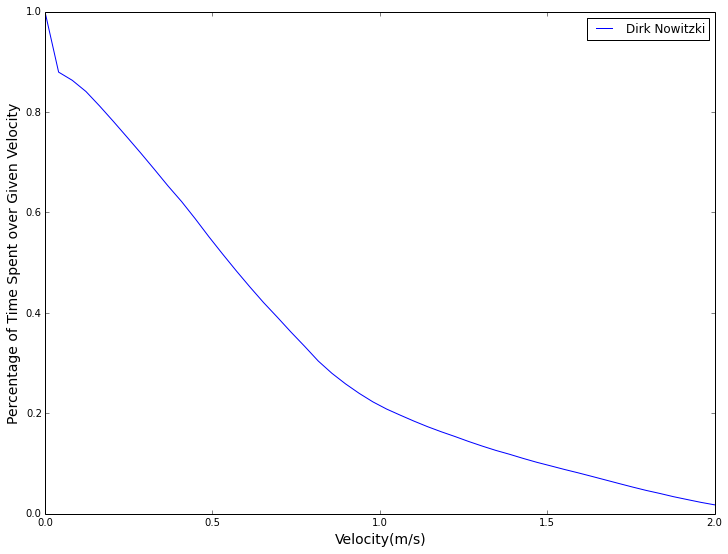

In [43]:
percentage(hometeam['3234'],1, 2)

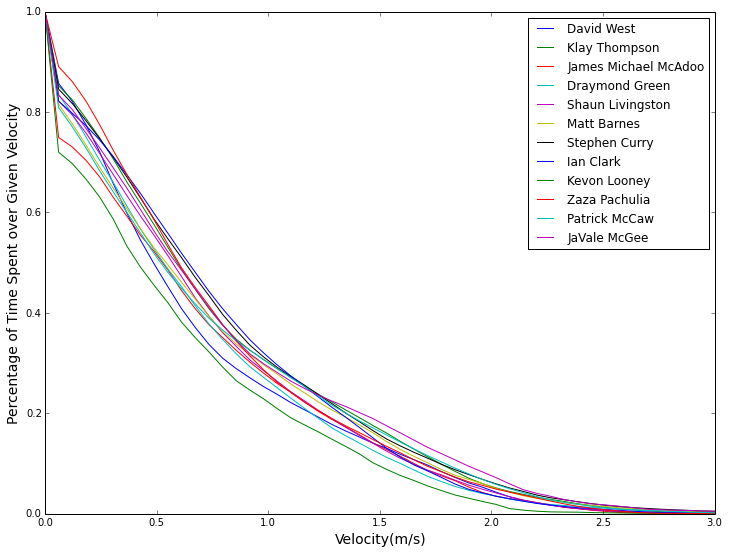

In [21]:
percentage(awayteam,3)

In [20]:
print homeScore

[30, 20, 21, 16]


(0, '463135')
(1, '552309')
(2, '3234')
(3, '173520')
(4, '401093')
(5, '698635')
(6, '606701')
(7, '552336')
(8, '699947')
(9, '555263')
(10, '65820')
(11, '922594')
(12, '295809')


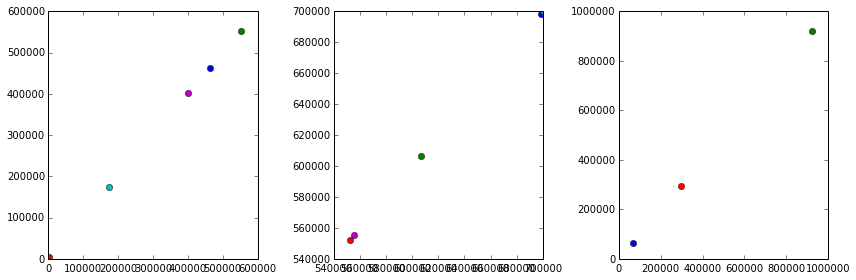

In [31]:
plt.figure(figsize=(12,4))

for i,key in enumerate(hometeam.keys()):
    print(i,key)
    
    plt.subplot(1,3,1+int(i/5))
    plt.plot([int(key)],[int(key)],'o')
    
plt.tight_layout()